In [1]:
# === 1. Load the organized CSV ===
import pandas as pd
import ast

input_file = "organized.csv"
df = pd.read_csv(input_file)

# Convert stringified lists back to real lists
for col in ["Blue","Green","Red","NIR","BAI","EVI","GEMI","NDVI","NDWI","Dates"]:
    df[col] = df[col].apply(ast.literal_eval)

print("✅ Loaded and parsed organized dataset.")
print("Columns:", df.columns.tolist())
print(df.head(1))



✅ Loaded and parsed organized dataset.
Columns: ['id', '20_labels', '21_labels', '22_labels', 'Blue', 'Green', 'Red', 'NIR', 'BAI', 'EVI', 'GEMI', 'NDVI', 'NDWI', 'Dates']
   id 20_labels 21_labels 22_labels  \
0   1        nb        nb        nb   

                                                Blue  \
0  [0.057, 0.057, 0.057, 0.057, 0.057, 0.057, 0.0...   

                                               Green  \
0  [0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.0...   

                                                 Red  \
0  [0.043, 0.043, 0.043, 0.043, 0.043, 0.043, 0.0...   

                                                 NIR  \
0  [0.093, 0.093, 0.093, 0.093, 0.093, 0.093, 0.0...   

                                                 BAI  \
0  [2.288, 2.288, 2.288, 2.288, 2.288, 2.288, 2.2...   

                                                 EVI  \
0  [0.136, 0.136, 0.136, 0.136, 0.136, 0.136, 0.1...   

                                                GEMI  \
0  [0.514, 0.51

In [6]:
import numpy as np

# Define which bands to use
bands = ["Blue","Green","Red","NIR","BAI","EVI","GEMI","NDVI","NDWI"]

# Build the feature matrix
X = []
for _, row in df.iterrows():
    features = []
    for band in bands:
        features.extend(row[band])
    X.append(features)

X = np.array(X)

# Select labels (2022)
y = df["22_labels"].replace({'nb': 0, 'pb': 0, 'tb': 1}).astype(int).values  # 0=not/partially burned, 1=completely burned

print(f"✅ Feature matrix shape: {X.shape}")
print(f"✅ Labels distribution:\n{pd.Series(y).value_counts()}")


✅ Feature matrix shape: (38957, 9855)
✅ Labels distribution:
0    36875
1     2082
Name: count, dtype: int64


/tmp/ipykernel_476/2156075650.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df["22_labels"].replace({'nb': 0, 'pb': 0, 'tb': 1}).astype(int).values  # 0=not/partially burned, 1=completely burned


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Training samples:", X_train.shape[0])
print("✅ Test samples:", X_test.shape[0])


✅ Training samples: 31165
✅ Test samples: 7792


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("✅ Model trained.")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))


✅ Model trained.
Accuracy: 0.9744609856262834

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      7376
           1       0.85      0.64      0.73       416

    accuracy                           0.97      7792
   macro avg       0.91      0.82      0.86      7792
weighted avg       0.97      0.97      0.97      7792



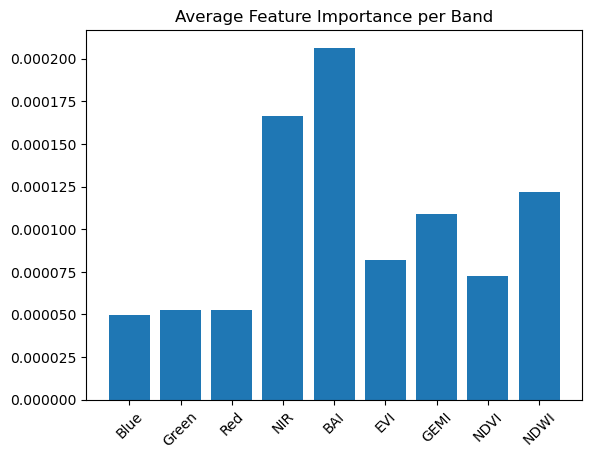

In [5]:
import matplotlib.pyplot as plt

# Compute approximate band importance
band_importances = {}
features_per_band = len(df.iloc[0]["Blue"])  # 1095 per band

for i, band in enumerate(bands):
    start = i * features_per_band
    end = start + features_per_band
    band_importances[band] = rf.feature_importances_[start:end].mean()

plt.bar(band_importances.keys(), band_importances.values())
plt.title("Average Feature Importance per Band")
plt.xticks(rotation=45)
plt.show()


In [9]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.6/620.6 MB 67.2 MB/s  0:00:07m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 63.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 63.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 65.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 68.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 62.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.2 MB/s  0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━  9/20 [ml_dtypes]d-data-server]  WARNING: The script markdown_py is installed in '/home/jovyan/.local/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━